In [18]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import numpy as np
#RF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
#DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv ('CollegeDistance.csv', index_col=0)

In [3]:
df.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


Zbiór ten tworzy 14 zmiennych:
- gender - oznacza płeć
- ethnicity - oznacza pochodzenie (afroamerykańskie, latynoskie, inne)
- score - rezultat testu przeprowadzonego na zakończenie drugiego stopnia edukacji (high school)
- fcollege - zmienna binarna oznaczająca, czy ojciec ankietowanej osoby ukończył edukację wyższą
- mcollege - zmienna binarna oznaczająca, czy matka ankietowanej osoby ukończyła edukację wyższą
- home - zmienna binarna oznaczająca, czy rodzina ankietowanej osoby posiada swój dom na własność
- urban - zmienna binarna oznaczająca, czy szkoła ankietowanego znajduje się na terenie zurbanizowanym
- unemp - stopa bezrobocia panująca w hrabstwie (okręgu - części składowej stanu) będącym miejscem zamieszkania osoby ankietowanej w roku 1980
- wage - stawka godzinowa za pracę fizyczną w fabryce w danym stanie w roku 1980 (wyrażone w USD)
- distance - odległość od domu ankietowanej osoby do najbliższej uczelni (wyrażona w 10 milach)
- tuition - średnie czesne wymagane przez uczelnie w danym stanie (wyrażone w 1000 USD)
- education - czas trwania edukacji osoby ankietowanej (wyrażony w latach)
- income - zmienna binarna oznaczająca, czy roczny dochód rodziny przekracza 25 tys. USD
- region - zmienna binarna oznaczająca region (zachód USA, czy inny)

In [4]:
df.describe()

,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


In [5]:
print("Mediana: ")
print("score: ",np.median(df["score"]))
print("unemp: ",np.median(df["unemp"]))
print("wage: ",np.median(df["wage"]))
print("distance: ",np.median(df["distance"]))
print("tuition: ",np.median(df["tuition"]))
print("education: ",np.median(df["education"]))

Mediana: 
score:  51.189998626709006
unemp:  7.099999904632571
wage:  9.68000030517578
distance:  1.0
tuition:  0.8244799971580509
education:  13.0


Zbiór College Distance nie posiada braków danych. Powyżej zaprezentowano macierz z podstawowymi statystykami opisowymi dotyczącymi zmiennych liczbowych. Dla większości z nich średnia nie odstaje znacząco od mediany - co świadczyć może o braku obserwacji odstających, które mogłyby zaburzyć wartość średniej. spośród nich najmniejsza względna różnica występuje dla zmiennych tuition oraz score. Jedynym wyjątkiem wśród zmiennych jest distance. Względna różnica wynosi aż 44% wartości średniej. Oznacza to, że niektórzy uczniowie mogli mieszkać skrajnie daleko od ośrodków akademickich - co wynikać może z charakterystyki terytorium Stanów Zjednoczonych. Oprócz wielkich aglomeracji i miast znajduje się tam wiele słabo zaludnionych obszarów oddalonych od terenów zurbanizowanych. Rozumowanie to potwierdza również znaczna wartość odchylenia standardowego, przekraczająca wartości zarówno średniej, jak i mediany (to jedyny taki przypadek w rozpatrywanych danych). Dla tej zmiennej również współczynnik zmienności jest najwyższy i wynosi aż 127%.

In [6]:
print(df)

      gender ethnicity      score fcollege mcollege home urban  unemp  wage  \
1       male     other  39.150002      yes       no  yes   yes    6.2  8.09   
2     female     other  48.869999       no       no  yes   yes    6.2  8.09   
3       male     other  48.740002       no       no  yes   yes    6.2  8.09   
4       male      afam  40.400002       no       no  yes   yes    6.2  8.09   
5     female     other  40.480000       no       no   no   yes    5.6  8.09   
6       male     other  54.709999       no       no  yes   yes    5.6  8.09   
7     female     other  56.070000       no       no  yes    no    7.2  8.85   
8     female     other  54.849998       no       no  yes    no    7.2  8.85   
9       male     other  64.739998      yes       no  yes   yes    5.9  8.09   
10    female     other  56.060001       no       no  yes   yes    5.9  8.09   
11    female     other  42.220001       no       no  yes   yes    5.9  8.09   
12    female      afam  61.180000       no      yes 

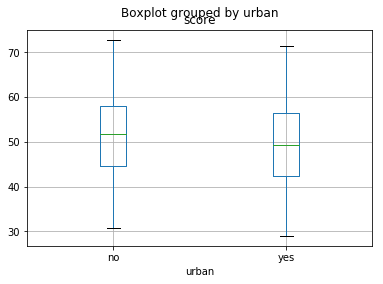

In [7]:
df.boxplot(column='score', by='urban')

Nieznacznie lepiej zaprezentowali się uczniowie szkół leżących poza metropoliami

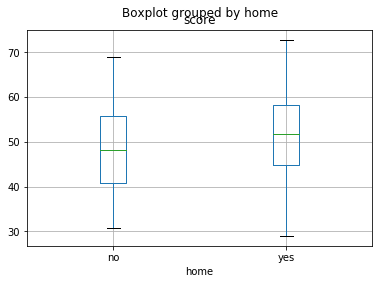

In [8]:
df.boxplot(column='score', by='home')

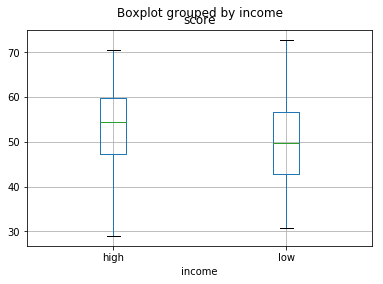

In [9]:
df.boxplot(column='score', by='income')

Dwa powyższe wykresy sugerują, że zamożność rodziny w niewielkim stopniu sprzyja osiąganiu dobrych wyników

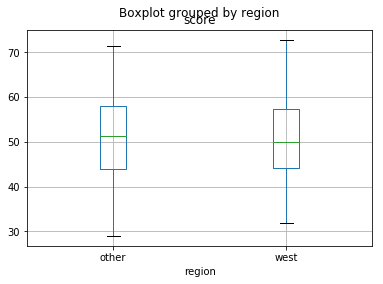

In [10]:
df.boxplot(column='score', by='region')

Region nie wpłynął znacząco na wyniki osiągane w teście

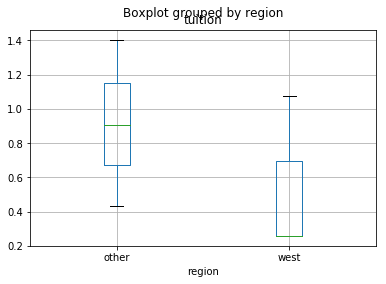

In [11]:
df.boxplot(column='tuition', by='region')

Czesne jest znacznie niższe na zachodzie USA

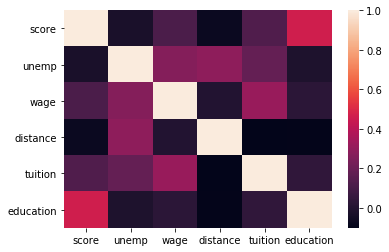

In [12]:
sns.heatmap(df.corr())

Największa korelacja dotyczy zmiennych education oraz score - najpewniej wartość score będzie mieć kluczowe znaczenie dla algorytmów uczenia statystycznego przy podejmowaniu decyzji o klasyfikacji zmiennej zależnej. Istotną korelację posiadają również zmienne tuition i wage oraz distance i unemp.

### Usuwanie oulierów

Do usuwania outlierów wykorzystano metodę mówiącą, żw wartością odstającą jest taka wartość, która różni się o ponad 3 odchylenia standardowe od średniej. 

In [13]:
z_scores = zscore(df[['score','unemp','wage','distance','tuition']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [14]:
print(new_df)

      gender ethnicity      score fcollege mcollege home urban  unemp  wage  \
1       male     other  39.150002      yes       no  yes   yes    6.2  8.09   
2     female     other  48.869999       no       no  yes   yes    6.2  8.09   
3       male     other  48.740002       no       no  yes   yes    6.2  8.09   
4       male      afam  40.400002       no       no  yes   yes    6.2  8.09   
5     female     other  40.480000       no       no   no   yes    5.6  8.09   
6       male     other  54.709999       no       no  yes   yes    5.6  8.09   
7     female     other  56.070000       no       no  yes    no    7.2  8.85   
8     female     other  54.849998       no       no  yes    no    7.2  8.85   
9       male     other  64.739998      yes       no  yes   yes    5.9  8.09   
10    female     other  56.060001       no       no  yes   yes    5.9  8.09   
11    female     other  42.220001       no       no  yes   yes    5.9  8.09   
12    female      afam  61.180000       no      yes 

In [15]:
#usuwam zmienne tekstowe
#ethnicity
new_df["IsAfam"]=np.where(new_df.ethnicity=="afam", 1,0) 
new_df["IsHispanic"]=np.where(new_df.ethnicity=="hispanic  ", 1,0) 
new_df=new_df.drop(columns="ethnicity")
#gender
new_df["IsFemale"]=np.where(new_df.gender=="female", 1,0) 
new_df=new_df.drop(columns="gender")
new_df["Fcollege"]=np.where(new_df.fcollege=="yes", 1,0) 
new_df=new_df.drop(columns="fcollege")
new_df["Mcollege"]=np.where(new_df.mcollege=="yes", 1,0) 
new_df=new_df.drop(columns="mcollege")
new_df["Home"]=np.where(new_df.home=="yes", 1,0) 
new_df=new_df.drop(columns="home")
new_df["Urban"]=np.where(new_df.urban=="yes", 1,0) 
new_df=new_df.drop(columns="urban")
new_df["Income"]=np.where(new_df.income=="high", 1,0) 
new_df=new_df.drop(columns="income")
new_df["IsWest"]=np.where(new_df.region=="west", 1,0) 
new_df=new_df.drop(columns="region")
#Tworzę zmienną y
i = new_df.education > 14  
new_df["DalszaEdukacja"]=np.where(i, 1,0) 
X=new_df.drop(columns="education")
X.tail()
y=X["DalszaEdukacja"]
X=X.drop(columns="DalszaEdukacja")
X.head()


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,score,unemp,wage,distance,tuition,IsAfam,IsHispanic,IsFemale,Fcollege,Mcollege,Home,Urban,Income,IsWest
1,39.150002,6.2,8.09,0.2,0.88915,0,0,0,1,0,1,1,1,0
2,48.869999,6.2,8.09,0.2,0.88915,0,0,1,0,0,1,1,0,0
3,48.740002,6.2,8.09,0.2,0.88915,0,0,0,0,0,1,1,0,0
4,40.400002,6.2,8.09,0.2,0.88915,1,0,0,0,0,1,1,0,0
5,40.480000,5.6,8.09,0.4,0.88915,0,0,1,0,0,0,1,0,0


Podział na zbiory testowy oraz uczący w proporcji 30:70.

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


## KNN


In [19]:
#parameters = {"n_neighbors": range(1, 50)}
#gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    

Text(0, 0.5, 'Mean Error')

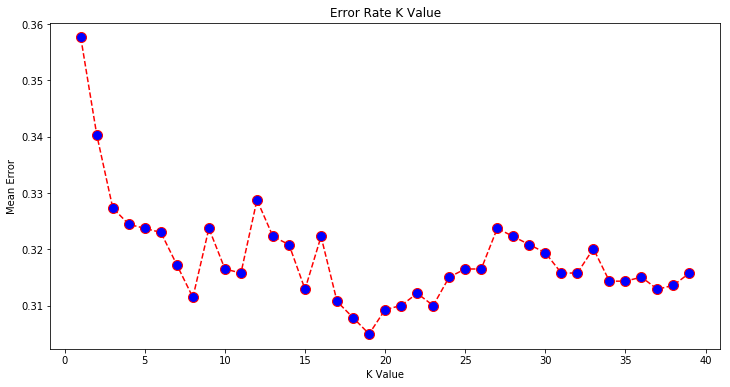

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [29]:
best_k = 0
mean_err = 1

for i in range(0, len(error)):
    if(error[i]<mean_err):
        mean_err = error[i]
        best_k = i + 1

print(best_k)
print(mean_err)

19
0.3049747656813266


In [34]:
knn1 = KNeighborsClassifier(n_neighbors=best_k)
knn1.fit(X_train, y_train)
pred_i1 = knn1.predict(X_test)

In [35]:
print("Accuracy (zbiór treningowy):",knn1.score(X_train,y_train))
print("Accuracy (zbiór testowy):",metrics.accuracy_score(y_test, pred_i1))

Accuracy (zbiór treningowy): 0.7370210135970334
Accuracy (zbiór testowy): 0.6950252343186734


In [36]:
errors_knn = abs(pred_i1 - y_test)
print('Mean Absolute Error:', round(np.mean(errors_knn), 2), 'degrees.')

Mean Absolute Error: 0.3 degrees.


In [37]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred_i1)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,693,169
Actual Positive,254,271


In [38]:
TP = cm_df.iloc[1,1]
TN = cm_df.iloc[0,0]
FP = cm_df.iloc[0,1]
FN = cm_df.iloc[1,0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 271
True Negatives: 693
False Positives: 169
False Negatives: 254


In [39]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.7
Mis-Classification: 0.3
Sensitivity: 0.52
Specificity: 0.8
Precision: 0.8
f_1 Score: 0.63


In [40]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, pred_i1)

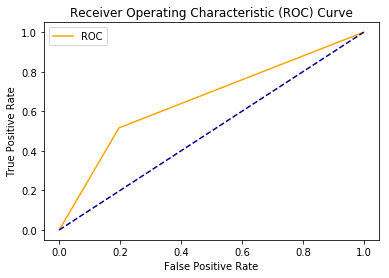

In [43]:
plot_roc_curve(fpr, tpr)

In [44]:
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.6600673958678599


## Random Forest

Random forest (Las losowy) jest to wariacja techniki drzewa decyzyjnego - zamiast jednego, rozpatruje się w niej n drzew. Każde z nich uczone jest w za pomocą unikalnego zbioru obserwacji, wybieranego metodą losowania ze zwracaniem. Ponadto poszczególne drzewa są tworzone w oparciu podzbiór zmiennych objaśniających o wielkości ustalonej parametrem mtry. Działania takie prowadzą do zmniejszenia korelacji pomiędzy drzewami. Im bardziej będą one niezależne, tym lepsze można osiągnąć wyniki - gdyż wówczas wariancja będzie mniejsza . Końcową decyzję o wartości zmiennej zależnej algorytm podejmuje na podstawie średniej (regresja) lub większości “głosów” na daną wartość (klasyfikacja). Technika ta charakteryzuje się odpornością na przeuczenie oraz problemy jakie można napotkać w zbiorze danych (braki,outliery,korelacja pomiędzy zmiennymi objaśniającymi)  W tej technice wpływ na wynika mają 4 parametry:
- n_estimators - liczba wykorzystanych w modelu drzew.
- max_features - przyjmuje się, że dla klasyfikacji parametr ten powinien być równy pierwiastkowi z liczby zmiennych (w rozpatrywanym przypadku sqrt(14)=3,74, stąd przyjęto wartość 4)
- min_samples_leaf - określa minimalną wielkość węzła. W wyniku klasyfikacji dokonywanej na poszczególnych poziomach drzewa obserwację są dzielone pomiędzy poszczególne węzły. Te z nich, które nie podlegają podziałowi okresliś można jako liście. Zatem min_samples_leaf określa minimalną liczbę obserwacji, która musi znaleźć się w każdym z takich liści. Warto pamiętać, że wartość ta powinna być uzależniona od wielkości próbki przeznaczonej do uczenia drzewa. Zwiększenie wartości node size skraca wysokość drzewa (i zwiększa szybkość kalkulacji).
- max_leaf_nodes - określa maksymalną liczbę liści jaką drzewo może posiadać. Domyślnie drzewa nie są ograniczane i mogą osiągać wartość liści ograniczaną jedynie przez parametr node size. Im mniejszy będzie wartość tego parametru, tym mniejsza wysokość drzewa.


In [22]:
# Liczba drzew
n_estimators = [20,50,100,200,500,1000,5000]
# Liczba cech brana za każdym razem pod uwagę
max_features = [2,3,4,5]
# Maksymalna liczba liści
max_leaf_nodes = [2, 5, 10,15]
# Minimalna wielkość liścia
min_samples_leaf = [1, 2, 4,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [20, 50, 100, 200, 500, 1000, 5000], 'max_features': [2, 3, 4, 5], 'max_leaf_nodes': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 8]}


In [32]:
#Filozofowie i maszyny
rf = RandomForestClassifier(random_state = 42)
randomForest = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1)
randomForest.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=20, min_samples_leaf=8, max_leaf_nodes=10, max_features=3, total=   0.0s
[CV] n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   7.0s
[CV] n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   6.7s
[CV] n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=5000, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   6.7s
[CV] n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3, total=   0.1s
[CV] n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3, total=   0.2s
[CV] n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=10, max_features=3, total=   0.2s
[CV] n_estimators=200, min_samples_leaf=1, max_

[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=2, max_features=5, total=   0.0s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=2, max_features=5 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=2, max_features=5, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4, total=   0.0s
[CV] n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=20, min_samples_leaf=4, max_leaf_nodes=10, max_features=4, total=   0.0s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=15, max_features=4 
[CV]  n_estimators=50, min_samples_leaf=8, max_leaf_nodes=15, max_features=4, total=   0.0s
[CV] n_estimators=50, min_samples_leaf=8, max_leaf_nodes=15, max_f

[CV]  n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=15, max_features=5, total=   9.1s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   0.6s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=4, total=   0.7s
[CV] n_estimators=1000, min_samples_leaf=1, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=1000, min_samples_leaf=1, max_leaf_nodes=10, max_features=3, total=   1.3s
[CV] n_estimators=1000, min_samples_leaf=1, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=1000, min_samples_leaf=1, max_leaf_nodes=10, max_features=3, total=   1.4s
[CV] n_estimators=1000, min_samples_leaf=1, max

[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=2, max_features=5, total=   0.3s
[CV] n_estimators=200, min_samples_leaf=4, max_leaf_nodes=2, max_features=5 
[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=2, max_features=5, total=   0.2s
[CV] n_estimators=200, min_samples_leaf=4, max_leaf_nodes=2, max_features=5 
[CV]  n_estimators=200, min_samples_leaf=4, max_leaf_nodes=2, max_features=5, total=   0.3s
[CV] n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5 
[CV]  n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5, total=   0.0s
[CV] n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5 
[CV]  n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5, total=   0.0s
[CV] n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5 
[CV]  n_estimators=50, min_samples_leaf=4, max_leaf_nodes=10, max_features=5, total=   0.0s
[CV] n_estimators=100, min_samples_leaf=2, max_leaf_nodes=15, m

[CV]  n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=2, max_features=2, total=   4.8s
[CV] n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=2, max_features=2 
[CV]  n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=2, max_features=2, total=   6.1s
[CV] n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=2, max_features=2 
[CV]  n_estimators=5000, min_samples_leaf=1, max_leaf_nodes=2, max_features=2, total=   5.9s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3, total=   0.6s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=10, max_features=3, total=   0.9s
[CV] n_estimators=100, min_samples_leaf=1, max_leaf_

[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=15, max_features=5, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=2, max_leaf_nodes=15, max_features=5 
[CV]  n_estimators=500, min_samples_leaf=2, max_leaf_nodes=15, max_features=5, total=   0.7s
[CV] n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2 
[CV]  n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2, total=   0.4s
[CV] n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2 
[CV]  n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2, total=   0.4s
[CV] n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2 
[CV]  n_estimators=500, min_samples_leaf=4, max_leaf_nodes=2, max_features=2, total=   0.4s
[CV] n_estimators=1000, min_samples_leaf=2, max_leaf_nodes=5, max_features=2 
[CV]  n_estimators=1000, min_samples_leaf=2, max_leaf_nodes=5, max_features=2, total=   1.3s
[CV] n_estimators=1000, min_samples_leaf=2, max_leaf_nodes

[CV]  n_estimators=500, min_samples_leaf=8, max_leaf_nodes=10, max_features=2, total=   0.5s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.9min finished


In [33]:
bestRF=randomForest.best_estimator_
print(bestRF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [34]:
predictions = bestRF.predict(X_test)

In [49]:
#Błąd bezwzględny prognozy
errors = abs(predictions - y_test)
print('Wartość błędu MAE:', round(np.mean(errors), 2), )
print("Accuracy (zbiór treningowy):",bestRF.score(X_train,y_train))
print("Accuracy (zbiór testowy):",metrics.accuracy_score(y_test, predictions))


Wartość błędu MAE: 0.29
Accuracy (zbiór treningowy): 0.7478368355995055
Accuracy (zbiór testowy): 0.7116077865897621


In [36]:
# Macierz pomyłek
cm = metrics.confusion_matrix(y_test, predictions)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,730,132
Actual Positive,268,257


In [37]:
TP = cm_df.iloc[1,1]
TN = cm_df.iloc[0,0]
FP = cm_df.iloc[0,1]
FN = cm_df.iloc[1,0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 257
True Negatives: 730
False Positives: 132
False Negatives: 268


In [38]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.49
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.62


In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

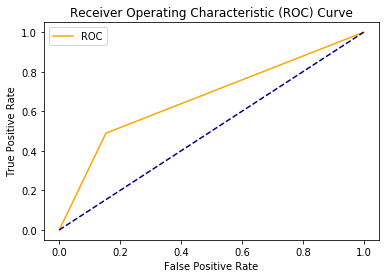

In [70]:
plot_roc_curve(fpr, tpr)

In [71]:
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.6681957794718816


## Decision Tree

Algorytm drzewa decyzyjnego należy do rodziny algorytmów uczenia nadzorowanego. Można go stosować zarówno do problemów klasyfikacji jak i regresji. Jednak głównym celem drzew decyzyjnych jest predykcja prognozowanej zmiennej za pomocą uczenia się na podstawie zbioru reguł decyzyjnych tworzonych w oparciu o zbiór testowy. W każdym węźle sprawdzany jest pewien warunek dotyczący danej obserwacji, i na jego podstawie wybierana jest jedną z gałęzi prowadząca do kolejnego wierzchołka. Klasyfikacja
danej obserwacji polega na przejściu od korzenia do liścia i przypisaniu do tej obserwacji klasy zapisanej w danym liściu. 

Drzewem decyzyjnym jest graf-drzewo, które składa się z korzenia, węzłów, krawędzi oraz liści. Liście to węzły, z których nie wychodzą już żadne krawędzie. Korzeń drzewa tworzony jest przez wybrany atrybut, natomiast poszczególne gałęzie reprezentują wartości tego atrybutu. Dzięki drzewu decyzyjnemu, zbudowanemu na podstawie danych empirycznych, można sklasyfikować nowe obiekty, które nie brały udziału w procesie tworzenia drzewa. Drzewa decyzyjne charakteryzują się strukturą hierarchiczną. Znaczy to, że w kolejnych krokach dzieli się zbiór obiektów, poprzez odpowiedzi na pytania o wartości wybranych cech lub ich kombinacji liniowych. Ostateczna decyzja zależy od odpowiedzi na wszystkie pytania.


In [50]:
dtree = DecisionTreeClassifier()#criterion="entropy", max_depth=3)
dtree = dtree.fit(X_train, y_train)

In [51]:
#data = tree.export_graphviz(dtree, out_file=None, feature_names=list(X_train.columns))

In [52]:
#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('mydecisiontree.png')

#img=pltimg.imread('mydecisiontree.png')
#imgplot = plt.imshow(img)
#plt.show()

In [53]:
y_pred = dtree.predict(X_test)

In [54]:
print("Accuracy (zbiór treningowy):",dtree.score(X_train,y_train))
print("Accuracy (zbiór testowy):",metrics.accuracy_score(y_test, y_pred))

Accuracy (zbiór treningowy): 1.0
Accuracy (zbiór testowy): 0.6496034607065609


In [55]:
errors_DT = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors_DT), 2), 'degrees.')

Mean Absolute Error: 0.35 degrees.


In [31]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,720,142
Actual Positive,270,255


In [32]:
TP = cm_df.iloc[1,1]
TN = cm_df.iloc[0,0]
FP = cm_df.iloc[0,1]
FN = cm_df.iloc[1,0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 255
True Negatives: 720
False Positives: 142
False Negatives: 270


In [33]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.7
Mis-Classification: 0.3
Sensitivity: 0.49
Specificity: 0.84
Precision: 0.84
f_1 Score: 0.61


In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

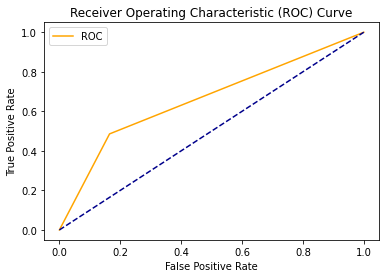

In [36]:
plot_roc_curve(fpr, tpr)

In [68]:
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.6681957794718816


# SVM

SVM (Support Vectore Machines) - zestaw metod nadzorowanego uczenia maszynowego, w którego skład wchodzą metody klasyfikacji, regresji i wykrywania outlierów. W projekcie zostanie wykorzystana metoda klasyfikacji SVC, gdyż nadaje się ona do przewidywania wartości zmiennej objaśnianej, która przyjmuje wartości 0 i 1. Parametr gamma został ustawiony na wartosć auto, co znaczy że parametry kernel'a będą dopasowywane automatycznie. Przed stworzeniem modelu przetestowano wpływ kernla na jakość dopasowania i uzyskano wynik, że najlepszym dopasowaniem charakteryzjue się kernel linear.

Procent prawidłowo przewidzianych obserwacji dla kernla:
sigmoid - 62%
rbf - 69%
linear - 72%
preprocesing - nie jest możliwy w tym problemie wymaga macierzy kwadratowej

Przed przystąpieniem do wykorzystania modelu dokonano normalizacji zmiennych objaśniających.

In [56]:
sc = StandardScaler()
X_train_SVC = sc.fit_transform(X_train)
X_test_SVC = sc.transform(X_test)
classifier = SVC(kernel = 'linear', gamma="auto")
classifier.fit(X_train, y_train)


C:\Users\jakub\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jakub\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
y_pred_SVC = classifier.predict(X_test)
y_pred_SVC

array([0, 0, 1, ..., 0, 0, 1])

In [61]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_SVC)
# Assigning columns names
cm_SVC = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
print(cm_SVC)
print("Accuracy:",accuracy_score(y_test, y_pred_SVC))
print("Accuracy (zbiór treningowy):",classifier.score(X_train,y_train))
print("Accuracy (zbiór testowy):",accuracy_score(y_test, y_pred_SVC))

                 Predicted Negative  Predicted Positive
Actual Negative                 721                 141
Actual Positive                 252                 273
Accuracy: 0.7166546503244412
Accuracy (zbiór treningowy): 0.7280593325092707
Accuracy (zbiór testowy): 0.7166546503244412


Pozastosowaniu tego modelu w celach prognostycznych, okazuje się że model ten ma **72%** skuteczności w prognozowaniu
danych ze zbioru testowego. Wynik ten nie można uznać za bardzo dobry, niemniej jest on lepszy od pozostałych modeli.
Analiza powyższej macierzy pokazuje, że w **721** przypadkach wartość prognozowana była negatywna tak jak wartośc rzeczywista,
w **273** przypadkach wartość prognozowana była pozytywna i rzeczywista też, w **141** przypadkach prognozowano wartość pozytywną
a rzeczywiście była negatywna, z kolei w **252** przypadkach wartość prognozowana była negatywna a rzeczywista pozytywna.
Można więc zobaczyć że model ten częściej się myli w sytuacji gdy wartość rzeczywista jest pozytywna.

In [62]:
TP_SVC = cm_SVC.iloc[1,1]
TN_SVC = cm_SVC.iloc[0,0]
FP_SVC = cm_SVC.iloc[0,1]
FN_SVC = cm_SVC.iloc[1,0]
print('True Positives:', TP_SVC)
print('True Negatives:', TN_SVC)
print('False Positives:', FP_SVC)
print('False Negatives:', FN_SVC)

True Positives: 273
True Negatives: 721
False Positives: 141
False Negatives: 252


In [63]:
errors_SVC = abs(y_pred_SVC - y_test)
print('Mean Absolute Error:', round(np.mean(errors_SVC), 2), 'degrees.')

Mean Absolute Error: 0.28 degrees.


Dla podanego modelu wartość średniego absolutnego błędu wynosi 0.28 tym samym jest to najmniejszy błąd ze wszystkich badanych modeli.

In [64]:
# calculate accuracy
conf_accuracy_SVC = (float (TP_SVC+TN_SVC) / float(TP_SVC + TN_SVC + FP_SVC + FN_SVC))
    
# calculate mis-classification
conf_misclassification_SVC = 1- conf_accuracy_SVC
    
# calculate the sensitivity
conf_sensitivity_SVC = (TP_SVC / float(TP_SVC + FN_SVC))
# calculate the specificity
conf_specificity_SVC = (TN_SVC / float(TN_SVC + FP_SVC))
    
# calculate precision
conf_precision_SVC = (TN_SVC / float(TN_SVC + FP_SVC))
# calculate f_1 score
conf_f1_SVC = 2 * ((conf_precision_SVC * conf_sensitivity_SVC) / (conf_precision_SVC + conf_sensitivity_SVC))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy_SVC,2)}') 
print(f'Mis-Classification: {round(conf_misclassification_SVC,2)}') 
print(f'Sensitivity: {round(conf_sensitivity_SVC,2)}') 
print(f'Specificity: {round(conf_specificity_SVC,2)}') 
print(f'Precision: {round(conf_precision_SVC,2)}')
print(f'f_1 Score: {round(conf_f1_SVC,2)}')

--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.52
Specificity: 0.84
Precision: 0.84
f_1 Score: 0.64


In [65]:
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, y_pred_SVC)

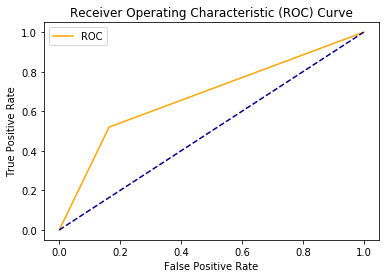

In [66]:
plot_roc_curve(fpr_SVC, tpr_SVC)

Na wykresie prosta przerywana zaznaczona kolorem niebieskim odpowiada klasyfikatorowi losowemu. Klasyfikator teoretyczny reprezentowany jest przez punkt (0,1), im bliżej krzywa ROC znajduje się tego punktu tym model jest bardziej efektywny, wartości tej krzywej ponad klasyfikator losowy oznaczają że model nadaje się do przewidywania badanych danych.

In [67]:
print("AUC: ",metrics.auc(fpr_SVC, tpr_SVC))

AUC:  0.6782134570765661
